In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np

import torch
import random
import math
import json

from tqdm import tqdm_notebook
from boltons.iterutils import pairwise
from scipy.stats import kendalltau
from itertools import permutations

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [5]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg-resid/sent_encoder.159.bin',
    map_location={'cuda:0': 'cpu'},
)

In [6]:
regressor = torch.load(
    '../../data/models/new/kt-reg-resid/regressor.159.bin',
    map_location={'cuda:0': 'cpu'},
)

In [7]:
train = Corpus('../../data/dev.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 7179.90it/s]


In [20]:
grafs = [g for g in train.grafs if len(g.sentences) == 5]

In [21]:
len(grafs)

1647

In [50]:
graf = random.choice(grafs)

In [51]:
[' '.join(s.tokens) for s in graf.sentences]

['A novel mechanism to realize the triplet - doublet splitting in supersymmetric SU(5 ) grand unified theories is proposed in the framework of higher dimensional theories where chiral multiplets are localized due to kink configuration of a SU(5 ) singlet .',
 'An adjoint Higgs field which spontaneously breaks the SU(5 ) gauge symmetry is assumed to be involved with the localization process , splitting the wave functions of the color - triplet Higgs from its doublet counterpart .',
 'The resulting effective four - dimensional theory does not possess manifest SU(5 ) invariance .',
 'By adjusting couplings , the doublet mass can be exponentially suppressed .',
 'We also show that dimension 5 proton decay from triplet Higgs exchange can be suppressed to a negligible level .']

In [52]:
sents = sent_encoder(graf.sentence_variables())

In [53]:
sents

Variable containing:
 2.9237e-04  1.0562e-05 -3.9997e-07  ...   8.3989e-02  2.0463e-06  6.5030e-04
-4.0985e-03 -5.4859e-05  1.1661e-04  ...   4.0543e-02 -1.1617e-05 -6.2221e-01
-3.4509e-04 -8.2701e-02  3.4016e-03  ...   5.6741e-02 -1.4923e-04 -3.5713e-02
-6.6308e-03  5.5921e-03  1.2579e-01  ...   2.1655e-02  5.8552e-01 -7.3239e-04
-2.3198e-03  2.5305e-04 -9.4351e-03  ...  -5.5641e-02  1.8973e-04 -5.9491e-03
[torch.FloatTensor of size 5x1000]

In [54]:
perms = list(permutations(range(5)))

In [55]:
x = []
kts = []
for perm in tqdm_notebook(perms):
    
    sort = torch.LongTensor(perm)
    x.append(sents[sort])
    
    kt = kendalltau(perm, range(5)).correlation
    kts.append(kt)

HBox(children=(IntProgress(value=0, max=120), HTML(value='')))

In [56]:
x = torch.stack(x)
y = regressor(x)

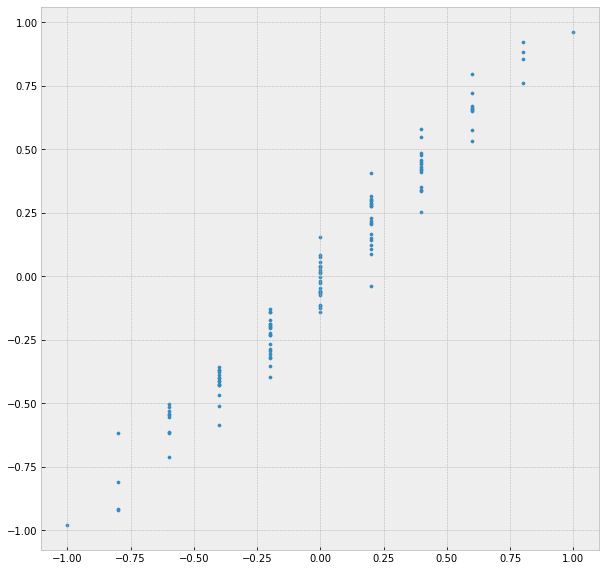

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(kts, y.data.tolist(), s=10)